In [93]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
from sklearn import metrics


In [2]:
df1 = pd.read_csv('adult+stretch.data') 
df2 = pd.read_csv('adult-stretch.data') 
df3 = pd.read_csv('yellow-small+adult-stretch.data') 
df4 = pd.read_csv('yellow-small.data') 
df = pd.concat([df1,df2,df3,df4])

# STEP - 2

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
train = train.astype('category')
test = test.astype('category')
x_train = train[['YELLOW','SMALL','STRETCH','ADULT']]
x_test = test[['YELLOW','SMALL','STRETCH','ADULT']]
y_train = train[['T']]
y_test = test[['T']]

# STEP - 3

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
xtrain = train[['YELLOW','SMALL','STRETCH','ADULT']]
xtest = test[['YELLOW','SMALL','STRETCH','ADULT']]
ytrain = train[['T']]
ytest = test[['T']]
xtest = np.array(xtest.apply(lambda x: x.cat.codes))
xtrain = np.array(xtrain.apply(lambda x: x.cat.codes))
ytest = np.array(ytest.apply(lambda x: x.cat.codes)).ravel()
ytrain = np.array(ytrain.apply(lambda x: x.cat.codes)).ravel()

In [40]:
score = {}
for k in range(2,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    score[k] = metrics.accuracy_score(ytest,ypred)

In [53]:
score

{2: 0.7727272727272727,
 3: 0.7272727272727273,
 4: 0.7272727272727273,
 5: 0.7272727272727273,
 6: 0.6818181818181818,
 7: 0.6818181818181818,
 8: 0.7727272727272727,
 9: 0.6818181818181818,
 10: 0.6818181818181818,
 11: 0.7727272727272727,
 12: 0.7727272727272727,
 13: 0.6818181818181818,
 14: 0.7727272727272727,
 15: 0.7727272727272727,
 16: 0.7727272727272727,
 17: 0.6818181818181818,
 18: 0.6818181818181818,
 19: 0.6818181818181818,
 20: 0.6818181818181818,
 21: 0.7272727272727273,
 22: 0.6818181818181818,
 23: 0.6818181818181818,
 24: 0.6818181818181818,
 25: 0.7272727272727273}


 Optimal value of k : 2 
 Accuracy = 77.27272727272727 %


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.71      0.62      0.67         8

    accuracy                           0.77        22
   macro avg       0.76      0.74      0.75        22
weighted avg       0.77      0.77      0.77        22



 Time Taken = -0.003178399999796966


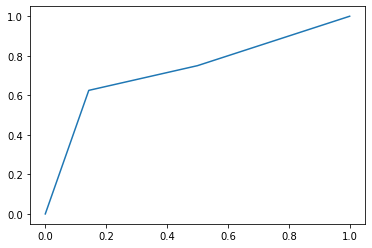

In [92]:
k = 2
print('\n Optimal value of k : {} \n Accuracy = {} %\n\n'.format(k,score[k]*100))
s = timeit.timeit()
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = knn.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.75      0.75      0.75         8

    accuracy                           0.82        22
   macro avg       0.80      0.80      0.80        22
weighted avg       0.82      0.82      0.82        22



 Time Taken = 3.1600000056641875e-05


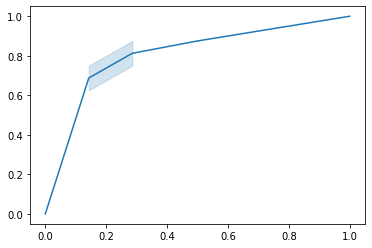

In [97]:
s = timeit.timeit()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = clf.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.60      0.75      0.67         8

    accuracy                           0.73        22
   macro avg       0.72      0.73      0.72        22
weighted avg       0.75      0.73      0.73        22



 Time Taken = 0.0019406999999773689


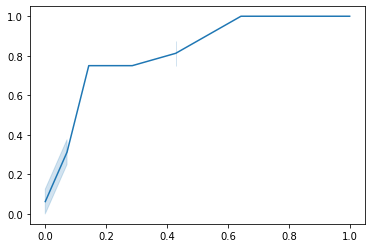

In [102]:
s = timeit.timeit()
clf = LogisticRegression(random_state=0,solver='lbfgs')
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = clf.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

In [104]:
x_test

,YELLOW,SMALL,STRETCH,ADULT
18,PURPLE,LARGE,DIP,CHILD
1,YELLOW,SMALL,DIP,ADULT
17,PURPLE,LARGE,DIP,CHILD
15,PURPLE,LARGE,STRETCH,ADULT
5,YELLOW,LARGE,DIP,ADULT
11,PURPLE,SMALL,STRETCH,CHILD
3,YELLOW,SMALL,STRETCH,ADULT
13,PURPLE,LARGE,DIP,ADULT
12,PURPLE,LARGE,STRETCH,CHILD
4,YELLOW,LARGE,STRETCH,ADULT
